# Support Vector Machines 

In this Notebook I will be coding along with the SVM chapter from Hands on Machine Learning book

### Linear SVM Classification

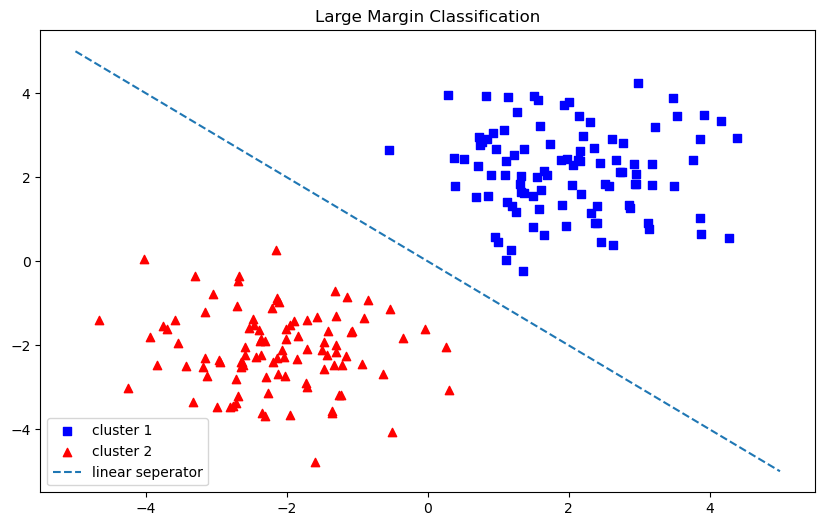

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.title('Large Margin Classification')

np.random.seed(0)
cluster_1 = np.random.randn(100,2) + np.array([2,2])  # 100 coordinates centred on 2,2
cluster_2 = np.random.randn(100,2) + np.array([-2,-2]) #100 coordinates centred on -2,-2

#plot
plt.scatter(cluster_1[:,0],cluster_1[:,1],color='b',marker='s',label='cluster 1')
plt.scatter(cluster_2[:,0],cluster_2[:,1],color='r',marker='^',label='cluster 2')

#linear seperator
x = np.linspace(-5,5,100)
y=-x
plt.plot(x,y,linestyle='--',label='linear seperator')
plt.legend()

- The fundamental idea of the SVM can be seen by the plot above, which separates two classes easily with a straight line.
- You can think of an SVM classifier as fitting the widest possible street between the classes if you imagine the separator in between the support vectors. 
- This is called large margin classification.
- Adding more training data only affects the decision boundary if it is near the edge; these data points near the edge are called the support vectors.

### Soft Margin Classification
- If we stay strict and say all datapoints must be on a clear side, this is called Hard Margin classification.
- there are some issues with this method
 - the data must be linearly seperable
 - It is vulnerable to outliers

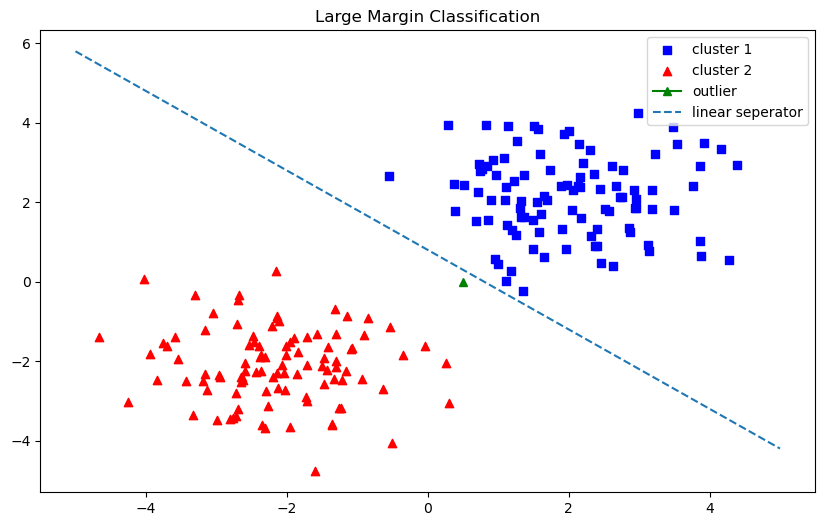

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.title('Large Margin Classification')

np.random.seed(0)
cluster_1 = np.random.randn(100,2) + np.array([2,2])  # 100 coordinates centred on 2,2
cluster_2 = np.random.randn(100,2) + np.array([-2,-2]) #100 coordinates centred on -2,-2

#plot
plt.scatter(cluster_1[:,0],cluster_1[:,1],color='b',marker='s',label='cluster 1')
plt.scatter(cluster_2[:,0],cluster_2[:,1],color='r',marker='^',label='cluster 2')
plt.plot(0.5,0,color='g',marker='^',label='outlier')

#linear seperator
x = np.linspace(-5,5,100)
y=-x+0.8
plt.plot(x,y,linestyle='--',label='linear seperator')
plt.legend()

- You can see clearly here that the presence of an outlier has shifted the decision boundary, making it look a lot different than before
- Furthermore, if the outlier was in cluster 2, a hard margin would be impossible.
- To avoid this, a more flexible model is used. We need to keep the street as large as possible and limit the amount of margin violations.
- This is called soft margin classification.

### Example Training a SVM Model

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #petal length, petal width
y = (iris['target']==2).astype(np.float64) #Iris virginica, each entry is 1 where specieis is virginica

svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_SVC',LinearSVC(C=1,loss='hinge')) #support vector classifier,hinge is standard for SVM
    ])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_SVC', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict( [[5.5,1.7]] )

array([1.])

Notice how, unlike logistic regression, the SVM classifier does not output probabilities for each class

#### Nuances
Instead of using the `LinearSVC` class, we can use the SVC class with a linear kernel, for example:
`SVC(kernel='linear', C=1)`.
Or we can use the `SGDClassifier(loss='hinge', alpha=1/(m*C))`. This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It is essentially doing the same thing. Note, it doesn't converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core training)

`# Define SVM classifier pipeline using SVC with linear kernel
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_SVC', SVC(kernel='linear', C=1))
])`

`# Define SVM classifier pipeline using SGDClassifier with hinge loss
sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_SGD', SGDClassifier(loss='hinge', alpha=1/(m*1)))  # Here C=1
])`

### Nonlinear SVM Classification
- Naturally most datasets are not linearly seperable
- sometimes you can add more features such as polynomial features to make a dataset linearly seperable
- you can see how adding a feature for example $x_2 = (x_1)^2$ can do this below

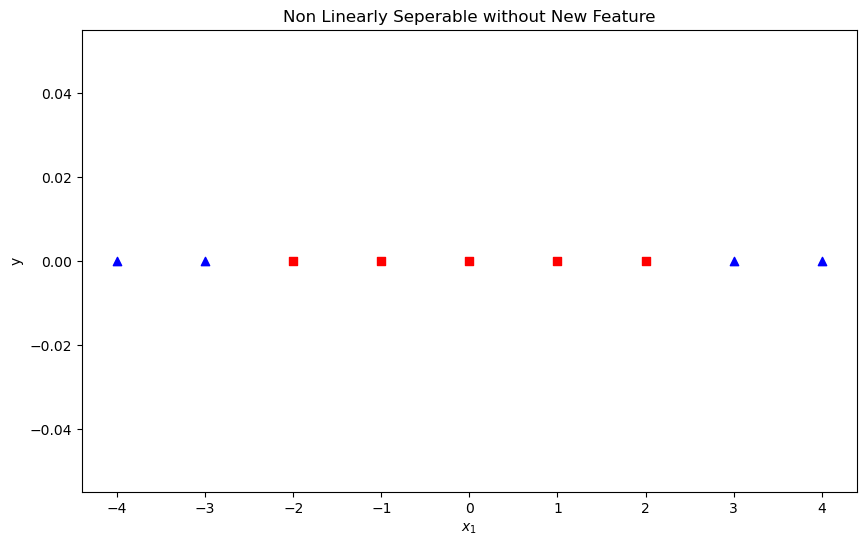

In [87]:
x1 = [-4,-3,3,4]
y1 = [0,0,0,0]
x2 = [-2,-1,0,1,2]
y2 = [0,0,0,0,0]

def plotNL_SVM_clf(x1,x2,y1,y2,title='Non Linearly Seperable without New Feature'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.scatter(x1,y1,marker='^',color='b')
    plt.scatter(x2,y2,marker='s',color='r')
    plt.xlabel('$x_1$')
    plt.ylabel('y')
plotNL_SVM_clf(x1,x2,y1,y2)

Text(0, 0.5, '$(x_1)^2$')

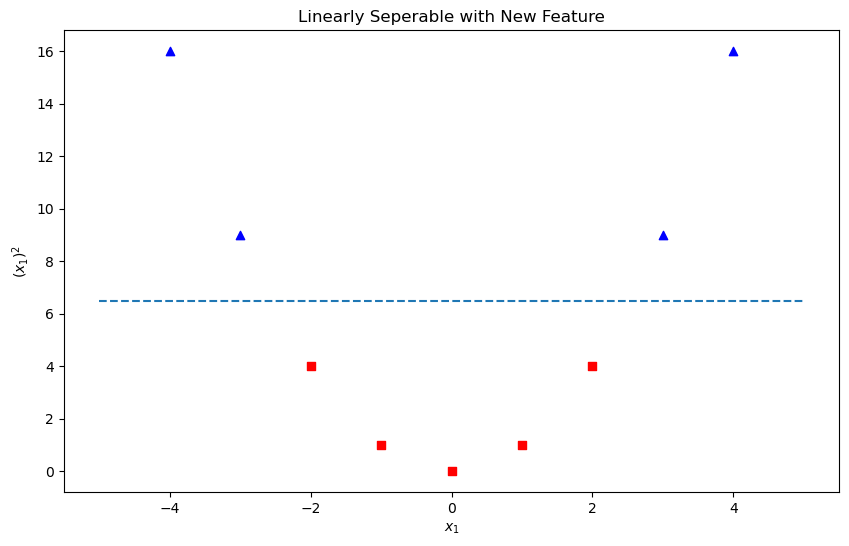

In [7]:
hline = np.linspace(-5,5,4)

plt.figure(figsize=(10,6))
plt.title('Linearly Seperable with New Feature')
plt.scatter(x1,np.square(x1),marker='^',color='b')
plt.scatter(x2,np.square(x2),marker='s',color='r')
plt.plot(hline,np.ones(4)*6.5,linestyle='--')
plt.xlabel('$x_1$')
plt.ylabel('$(x_1)^2$')

#### Implementing in SKLearn
We will test this on the moons dataset plotted below, this is a toy dataset perfect for testing non linear SVM classification

Text(0.5, 1.0, 'Moons Data Plot')

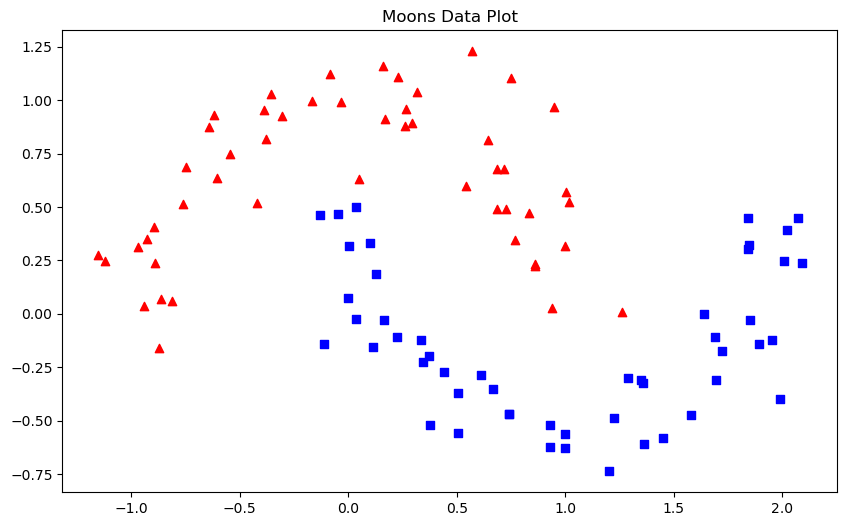

In [8]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100,noise=0.15,random_state=0) #generate dataset
plt.figure(figsize=(10,6))
plt.scatter(X[y==0,0],X[y==0,1],color='r',marker='^')
plt.scatter(X[y==1,0],X[y==1,1],color='b',marker='s')
plt.title('Moons Data Plot')

#### Fit the Data


In [9]:
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),#degree of polynomial
    ('scaler',StandardScaler()), 
    ('svm_clf',LinearSVC(C=10,loss='hinge',max_iter=5000)) #C=10 for high regularisation
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000))])

#### Creating Contour Plot

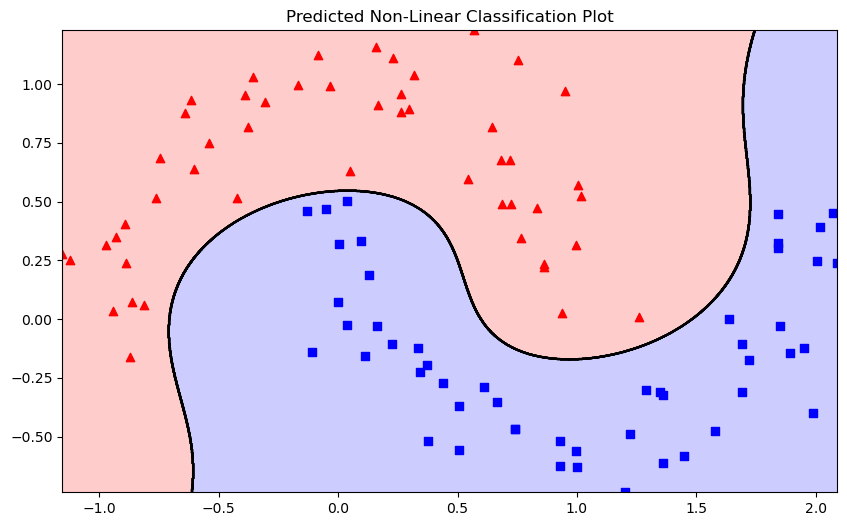

In [39]:
gridx = np.linspace(np.min(X[:,0]),np.max(X[:,0]),2000)
gridy = np.linspace(np.min(X[:,1]),np.max(X[:,1]),2000)

gridX,gridY = np.meshgrid(gridx,gridy) #get all possible combinations of x,y coord
combos = np.stack((gridX.ravel(),gridY.ravel()),axis=1) #get all coordinate combos for pred
predictions = polynomial_svm_clf.predict(combos)
pred_matrix = predictions.reshape(gridX.shape)

plt.figure(figsize=(10,6))
plt.title('Predicted Non-Linear Classification Plot')
plt.scatter(X[y==0,0],X[y==0,1],color='r',marker='^')
plt.scatter(X[y==1,0],X[y==1,1],color='b',marker='s')
plt.contour(gridx,gridy,pred_matrix,colors='black')
plt.contourf(gridX, gridY, pred_matrix,levels=[-0.5,0.5,1.5],alpha=0.2, colors=['red', 'blue'])

#### Polynomial Kernel
- There is a tradeoff as having too low polynomial degrees we cannot capture complex datasets and with a high polynomial degree there is a huge amount of features making the model slow
- With SVMs you can apply a mathematical trick called the kernel trick to get the same resulkts as if you added many polynomial features
- we can implement this using the SVC class

In [41]:
from sklearn.svm import SVC 
poly_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))
    ])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code trained the SVM classifier using a third degree polynomial kernel as seen below, and a tenth degree polymial

In [46]:
def plot_contour(X,y,degrees=3):

    poly_kernel_svm_clf = Pipeline([
        ('scaler',StandardScaler()),
        ('svm_clf',SVC(kernel='poly',degree=degrees,coef0=1,C=10))
        ])
    poly_kernel_svm_clf.fit(X,y)
    
    
    gridx = np.linspace(np.min(X[:,0]),np.max(X[:,0]),1000)
    gridy = np.linspace(np.min(X[:,1]),np.max(X[:,1]),1000)

    gridX,gridY = np.meshgrid(gridx,gridy) #get all possible combinations of x,y coord
    combos = np.stack((gridX.ravel(),gridY.ravel()),axis=1) #get all coordinate combos for pred
    predictions = poly_kernel_svm_clf.predict(combos)
    pred_matrix = predictions.reshape(gridX.shape)

    plt.figure(figsize=(10,6))
    plt.title(f'Predicted Poly-plot degree={degrees}')
    plt.scatter(X[y==0,0],X[y==0,1],color='r',marker='^')
    plt.scatter(X[y==1,0],X[y==1,1],color='b',marker='s')
    plt.contour(gridx,gridy,pred_matrix,colors='black')
    plt.contourf(gridX, gridY, pred_matrix,levels=[-0.5,0.5,1.5],alpha=0.2, colors=['red', 'blue'])

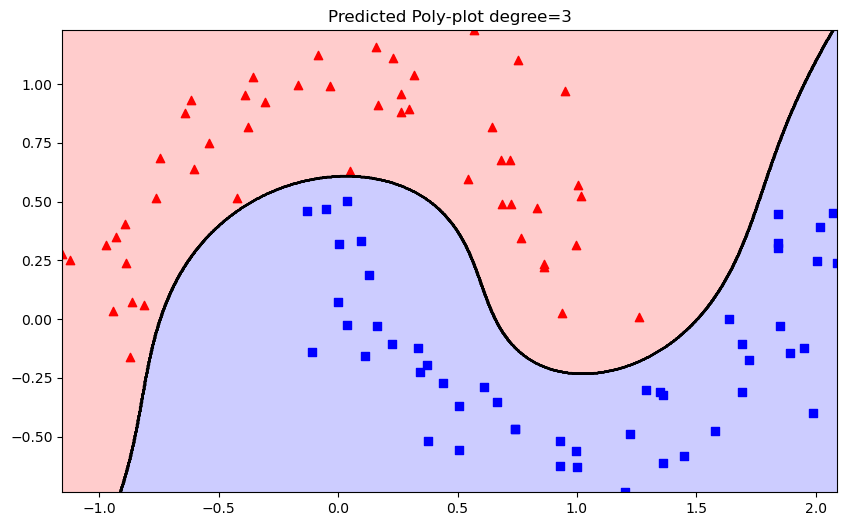

In [47]:
plot_contour(X,y,degrees=3)

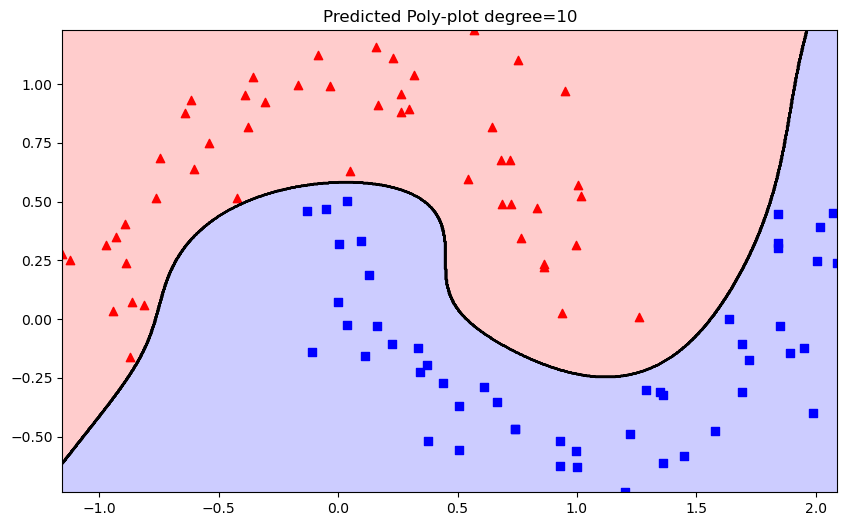

In [48]:
plot_contour(X,y,degrees=10)

### Similarity Features
- We can solve nonlinear problems  by adding features computed using a similarity cuntion
- This measures how much each instance resembles a particular landmark
- for example we can define a landmark at x1=-2 and x1=1 then define a siliarity function such as the Gaussian Radial Basis Function(RBF) with $\gamma = 0.3$ : 
$$
\phi_\gamma(x, x') = \exp\left(-\gamma \| x - x' \|^2 \right)
$$

where:
- $( \| x - x' \|^2 )$ is the squared Euclidean distance between the two samples ie the landmark and the datapoint.
- $ \gamma $ is a parameter that defines the width of the Gaussian function.
- This function is bell shaped and varies from 0 very far away from the landmark to 1 at thge landmark
- what we can do is generate new features for each datapoint relative to each landmark used and this can make the data linearly seperable

In [65]:
def RBF(x,x_dash,gamma=0.3):
    x_dash = np.array(x_dash)
    return np.exp(-gamma * np.square(np.abs(x - x_dash)))


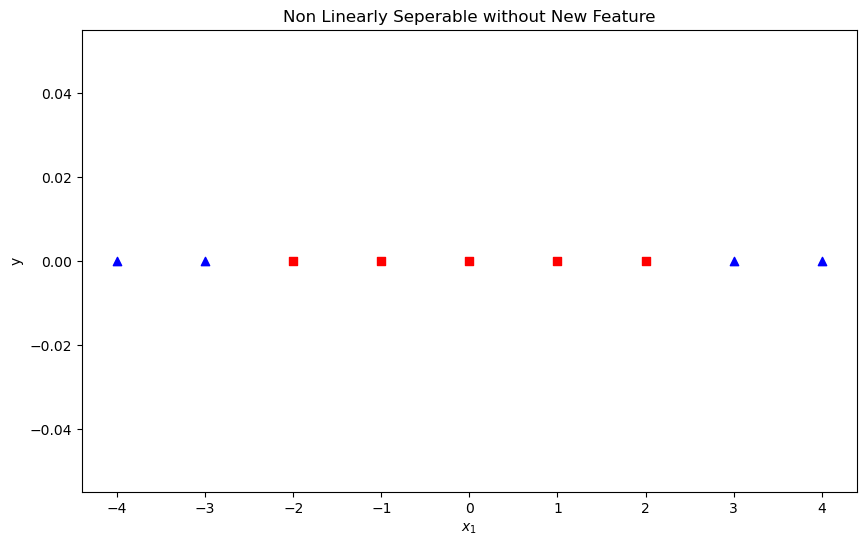

In [76]:
x1 = [-4,-3,3,4]
y1 = [0,0,0,0]
x2 = [-2,-1,0,1,2]
y2 = [0,0,0,0,0]
plotNL_SVM_clf(x1,x2,y1,y2)

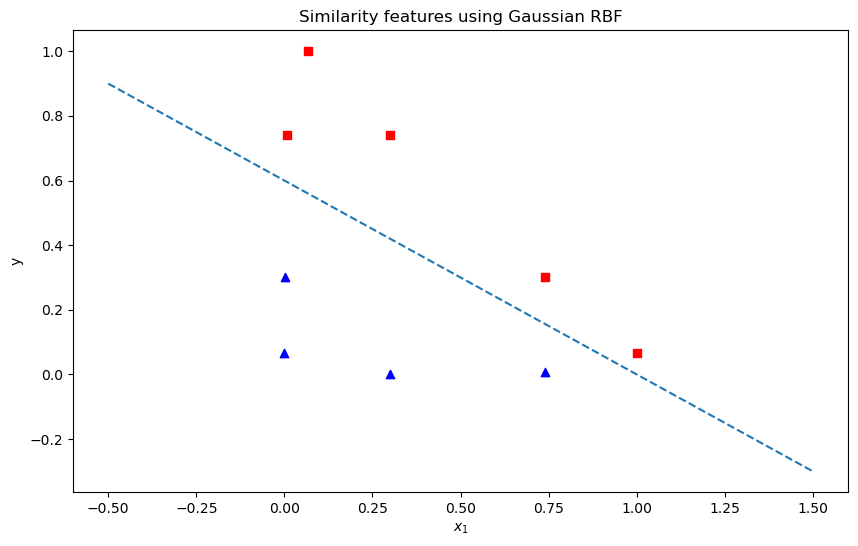

In [97]:
#### Choosing the landmarks as x1=-2 , x2 = 1 to generate 2 new features to plot in 2D
new_feature_x1 = RBF(x=-2,x_dash=x1) 
new_feature_y1 = RBF(x=1,x_dash=x1)

new_feature_x2 = RBF(x=-2,x_dash=x2) 
new_feature_y2 = RBF(x=1,x_dash=x2)

def line(x,m,c):
    return m*x + c

title = 'Similarity features using Gaussian RBF'
plotNL_SVM_clf(new_feature_x1 ,new_feature_x2,new_feature_y1,new_feature_y2,title)
xval = np.linspace(-0.5,1.5,100)
plt.plot(xval,line(xval,-0.6,0.6),linestyle='--')

As you can see the data is clearly linearly seprable after a similarity function was applied